In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import json
plt.style.use('seaborn-whitegrid')

C:\Users\Hp\AppData\Local\Temp\ipykernel_31452\2674800830.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [10]:
def count_annotations(data):
    span_count = {
        'Character': 0, 
        'Action': 0, 
        'Subject':0, 
        'Verb': 0
    }
    adherence_count = {
        'Character-Subject Misalignment': 0,
        'Action-Verb Misalignment': 0,
        'Long Abstract Subject': 0,
        'Long Introductory Phrases and Clauses': 0,
        'Subject-Verb Interruption': 0,
    }

    for d in data:
        result = d['annotations'][0]['result']

        for x in result:
            if 'value' in x:
                if x['type']=='labels':
                    span_count[x['value']['labels'][0]] += 1
                else:
                    adherence_count[x['value']['choices'][0]] += 1
    
    return span_count, adherence_count


In [36]:
paths = [
    'StyleExamples/annotation-original.json',
    'ParaSCI-arXiv-train/annotation-original.json',
    'ParaSCI-arXiv-test/annotation-original.json',
    'MSRP-train/annotation-original.json',
    'MSRP-test/annotation-original.json',
]

sent_count = {}
indexes = [x.split('/')[0] for x in paths]
span_df = pd.DataFrame(index=indexes)
adherence_df = pd.DataFrame(index=indexes)
for file_path in paths:
    x = file_path.split('/')[0]
    with open(file_path, 'r', encoding='utf-8') as f:
        data = json.load(f)
    sent_count[x] = len(data)
    spans, adherence = count_annotations(data)
    # span labels
    df = pd.DataFrame.from_dict(spans, 'index', columns=[x])
    for span in df.index:
        span_df.loc[x, span] = df.loc[span, x]

    # adherence labels
    df = pd.DataFrame.from_dict(adherence, 'index', columns=[x])
    for choice in df.index:
        adherence_df.loc[x, choice] = df.loc[choice, x]

In [37]:
paths = [
    'StyleExamples/annotation-paraphrase.json',
    'ParaSCI-arXiv-train/annotation-paraphrase.json',
    'ParaSCI-arXiv-test/annotation-paraphrase.json',
    'MSRP-train/annotation-paraphrase.json',
    'MSRP-test/annotation-paraphrase.json',
]

for file_path in paths:
    x = file_path.split('/')[0]
    with open(file_path, 'r') as f:
        data = json.load(f)
    sent_count[x] += len(data)
    spans, adherence = count_annotations(data)

    # span labels
    df = pd.DataFrame.from_dict(spans, 'index', columns=[x])
    for span in df.index:
        span_df.loc[x, span] += df.loc[span, x]

    # adherence labels
    df = pd.DataFrame.from_dict(adherence, 'index', columns=[x])
    for choice in df.index:
        adherence_df.loc[x, choice] += df.loc[choice, x]

In [38]:
span_df = span_df.astype('int')
adherence_df = adherence_df.astype('int')

In [39]:
span_df

,Character,Action,Subject,Verb
StyleExamples,226,347,140,140
ParaSCI-arXiv-train,238,360,301,316
ParaSCI-arXiv-test,81,86,93,91
MSRP-train,315,413,243,242
MSRP-test,159,169,128,127


In [40]:
adherence_df

,Character-Subject Misalignment,Action-Verb Misalignment,Long Abstract Subject,Long Introductory Phrases and Clauses,Subject-Verb Interruption
StyleExamples,45,10,4,3,3
ParaSCI-arXiv-train,10,17,13,10,3
ParaSCI-arXiv-test,13,0,6,4,2
MSRP-train,11,1,6,5,13
MSRP-test,9,9,1,1,5


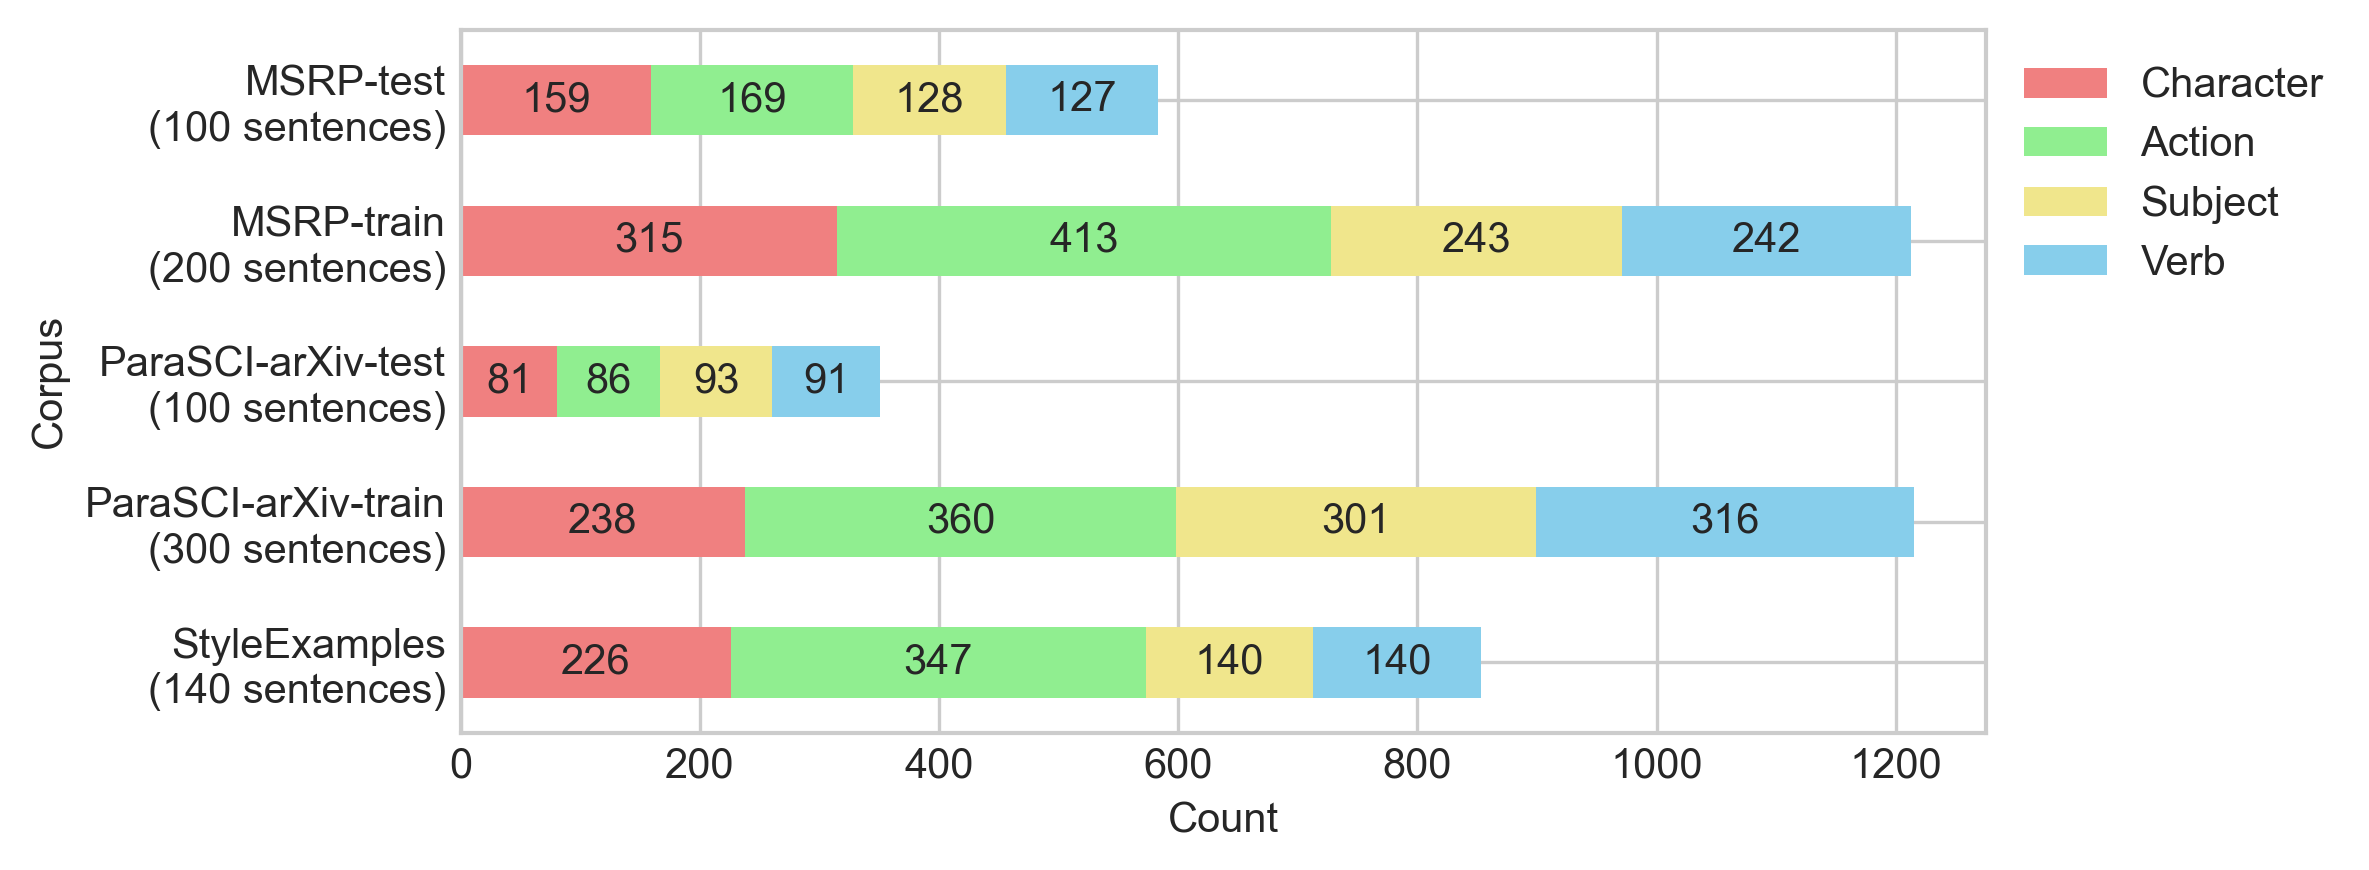

In [41]:
colors = matplotlib.colors.ListedColormap(['lightcoral', 'lightgreen', 'khaki', 'skyblue'])
fig = plt.figure(dpi=300)
ax = fig.gca()
df = span_df.sort_index(axis=0, ascending=False, kind='quicksort')
df.index = [
    'StyleExamples\n(140 sentences)',
    'ParaSCI-arXiv-train\n(300 sentences)',
    'ParaSCI-arXiv-test\n(100 sentences)',
    'MSRP-train\n(200 sentences)', 
    'MSRP-test\n(100 sentences)', 
]
df.plot.barh(stacked='True', figsize=(8, 3), colormap=colors, ax=ax)
plt.xlabel('Count')
plt.ylabel('Corpus')
# plt.title('Span Labels Distribution')
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.tight_layout()

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(
        x+width/2, 
        y+height/2, 
        '{}'.format(int(width)), 
        horizontalalignment='center', 
        verticalalignment='center',
        # color='w'
    )
plt.show()

In [27]:
df_n = adherence_df.div(adherence_df.sum(axis=1), axis=0)
df_n

,Character-Subject Misalignment,Action-Verb Misalignment,Long Abstract Subject,Long Introductory Phrases and Clauses,Subject-Verb Interruption
StyleExamples,0.692308,0.153846,0.061538,0.046154,0.046154
ParaSCI-arXiv-train,0.188679,0.320755,0.245283,0.188679,0.056604
ParaSCI-arXiv-test,0.520000,0.000000,0.240000,0.160000,0.080000
MSRP-train,0.305556,0.027778,0.166667,0.138889,0.361111
MSRP-test,0.360000,0.360000,0.040000,0.040000,0.200000


In [25]:
vals = adherence_df.sort_index(axis=0, ascending=False, kind='quicksort').to_numpy().T.flatten()
vals

array([45, 10, 13, 11,  9, 10, 17,  0,  1,  9,  4, 13,  6,  6,  1,  3, 10,
        4,  5,  1,  3,  3,  2, 13,  5])

In [28]:
df_n.columns = ['AlignCharSubj', 'AlignActionVerb', 'AvoidLongSubj', 'AvoidLongIntro', 'AvoidInterruptSV']
df_n = df_n.sort_index(axis=0, ascending=False, kind='quicksort')
df_n.index = [
    'StyleExamples\n(140 sentences)',
    'ParaSCI-arXiv-train\n(300 sentences)',
    'ParaSCI-arXiv-test\n(100 sentences)',
    'MSRP-train\n(200 sentences)', 
    'MSRP-test\n(100 sentences)', 
]

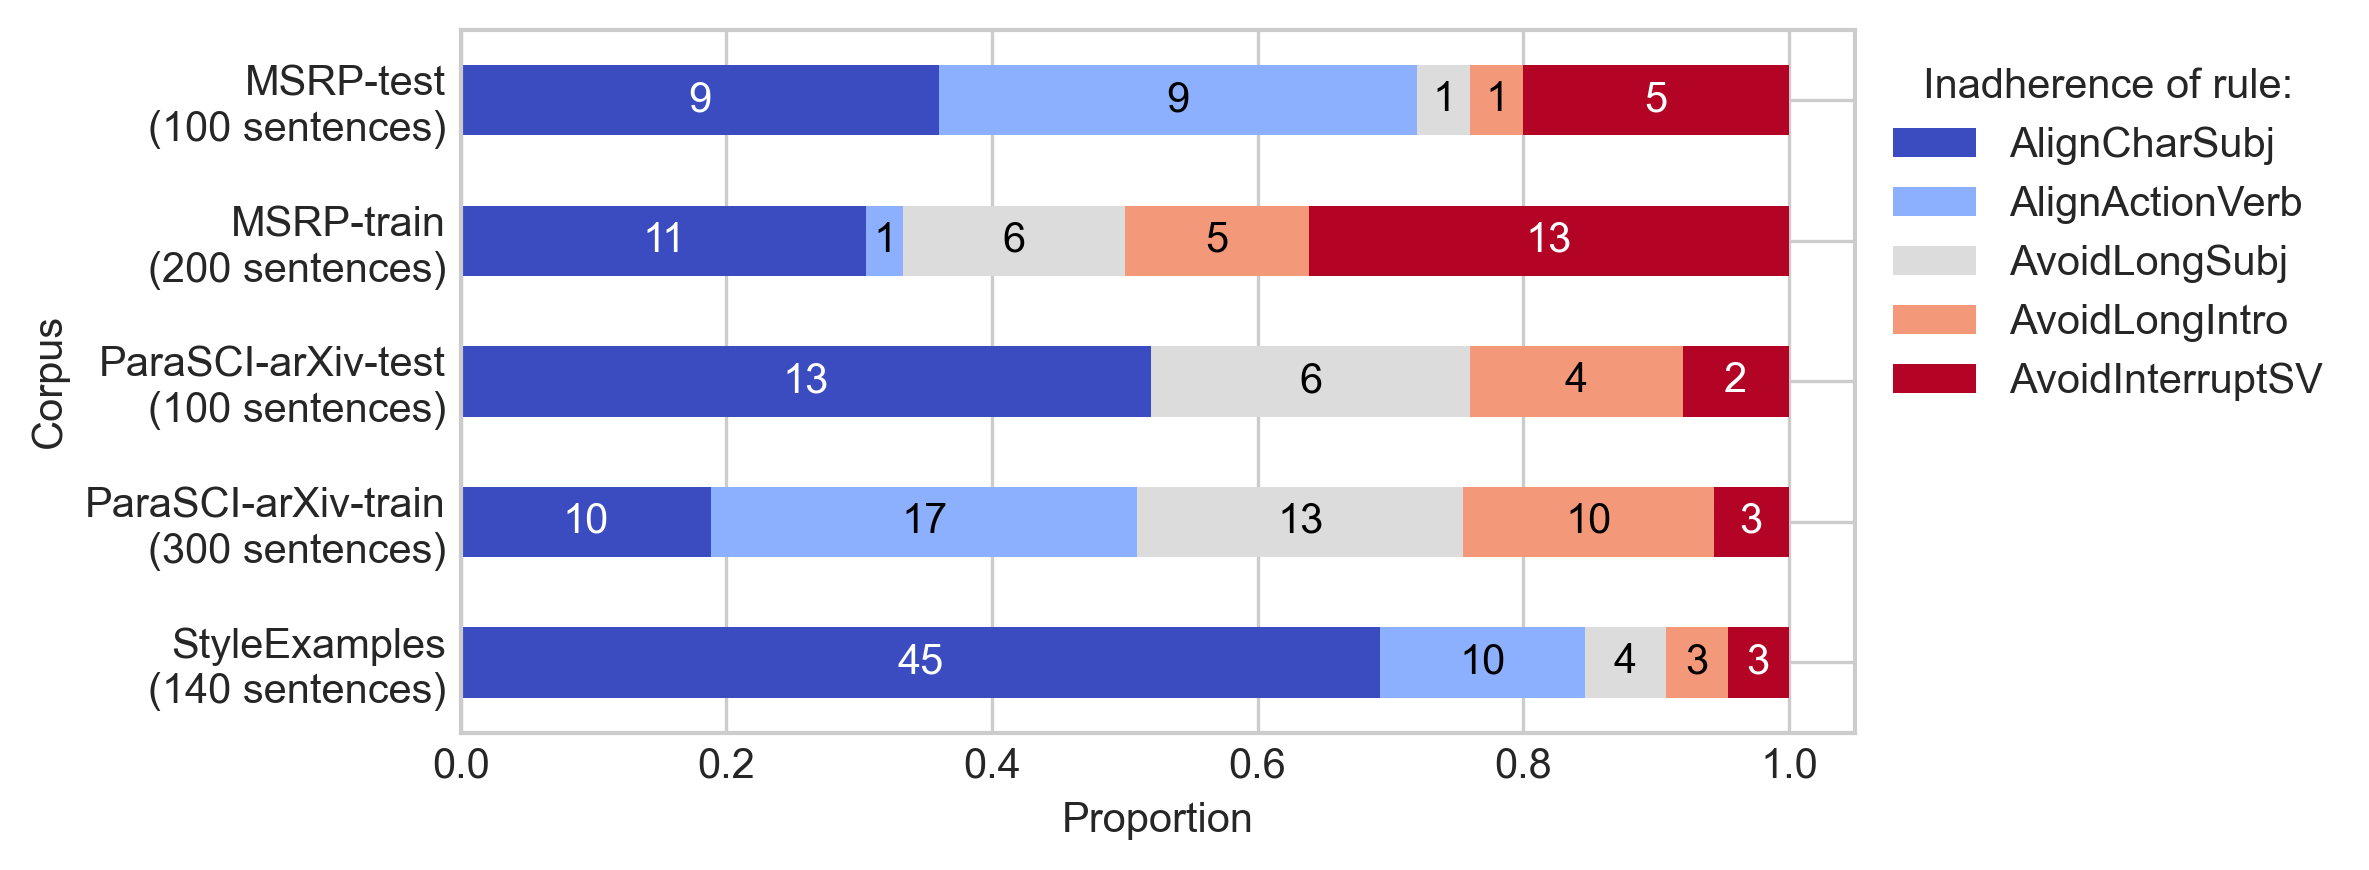

In [42]:
# Plotting the stacked bar plot
fig = plt.figure(dpi=300)
ax = fig.gca()
df_n.plot(kind='barh', stacked=True, figsize=(8, 3), colormap='coolwarm', ax=ax)
plt.xlabel('Proportion')
plt.ylabel('Corpus')
# plt.title('Adherence Labels Distribution')
plt.legend(loc="upper left", bbox_to_anchor=(1,1), title='Inadherence of rule:')
plt.tight_layout()

for i, p in enumerate(ax.patches):
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    if width != 0:
        ax.text(
        x+width/2, 
        y+height/2, 
        vals[i],
        horizontalalignment='center',
        verticalalignment='center',
        color='white' if i//5==0 or i//5==4 else 'black'
    )
plt.show()

In [45]:
print(span_df.to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &  Character &  Action &  Subject &  Verb \\
\midrule
StyleExamples       &        226 &     347 &      140 &   140 \\
ParaSCI-arXiv-train &        238 &     360 &      301 &   316 \\
ParaSCI-arXiv-test  &         81 &      86 &       93 &    91 \\
MSRP-train          &        315 &     413 &      243 &   242 \\
MSRP-test           &        159 &     169 &      128 &   127 \\
\bottomrule
\end{tabular}



C:\Users\Hp\AppData\Local\Temp\ipykernel_31452\3407849935.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(span_df.to_latex())


In [44]:
print(adherence_df.to_latex())

\begin{tabular}{lrrrrr}
\toprule
{} &  Character-Subject Misalignment &  Action-Verb Misalignment &  Long Abstract Subject &  Long Introductory Phrases and Clauses &  Subject-Verb Interruption \\
\midrule
StyleExamples       &                              45 &                        10 &                      4 &                                      3 &                          3 \\
ParaSCI-arXiv-train &                              10 &                        17 &                     13 &                                     10 &                          3 \\
ParaSCI-arXiv-test  &                              13 &                         0 &                      6 &                                      4 &                          2 \\
MSRP-train          &                              11 &                         1 &                      6 &                                      5 &                         13 \\
MSRP-test           &                               9 &                    

C:\Users\Hp\AppData\Local\Temp\ipykernel_31452\746729607.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(adherence_df.to_latex())


In [148]:
sent_count

{'StyleExamples': 140,
 'ParaSCI-arXiv-train': 300,
 'ParaSCI-arXiv-test': 100,
 'MSRP-train': 200,
 'MSRP-test': 100}

## Sytem Evaluations

In [168]:
columns = ['Corpus', 'Set', 'Rule', 'TP', 'FP', 'FN', 'TN', 'Precision', 'Recall', 'F1-score', 'Accuracy']
data = [
    ['StyleExamples', 'paraphrase', 'AlignCharSubj', 0, 22, 0, 48, 0.0, None, None, 68.6],
    ['StyleExamples', 'paraphrase', 'AlignActionVerb', 0, 19, 0, 51, 0.0, None, None, 72.9],
    ['StyleExamples', 'paraphrase', 'AvoidLongSubj', 0,    0,    0,   70,  None, None, None, 100.0],
    ['StyleExamples', 'paraphrase', 'AvoidLongIntro', 3,    5,    0,   62, 37.5, 100.0, 54.5, 92.9],
    ['StyleExamples', 'paraphrase', 'AvoidInterruptSV', 0,    0,    0,   70,  None, None, None, 100.0],
    
    ['StyleExamples', 'original', 'AlignCharSubj',   24,    8,   21,   17, 75.0, 53.3, 62.3, 58.6],
    ['StyleExamples', 'original', 'AlignActionVerb',   40,    9,    7,   14, 81.6, 85.1, 83.3, 77.1],
    ['StyleExamples', 'original', 'AvoidLongSubj',   15,    1,    2,   52, 93.8, 88.2, 90.9, 95.7],
    ['StyleExamples', 'original', 'AvoidLongIntro',    3,    0,    1,   66,100.0, 75.0, 85.7, 98.6],
    ['StyleExamples', 'original', 'AvoidInterruptSV',    2,    2,    2,   64, 50.0, 50.0, 50.0, 94.3],
]

df = pd.DataFrame(data, columns=columns)
df

,Corpus,Set,Rule,TP,FP,FN,TN,Precision,Recall,F1-score,Accuracy
0,StyleExamples,paraphrase,AlignCharSubj,0,22,0,48,0.0,NaN,NaN,68.6
1,StyleExamples,paraphrase,AlignActionVerb,0,19,0,51,0.0,NaN,NaN,72.9
2,StyleExamples,paraphrase,AvoidLongSubj,0,0,0,70,NaN,NaN,NaN,100.0
3,StyleExamples,paraphrase,AvoidLongIntro,3,5,0,62,37.5,100.0,54.5,92.9
4,StyleExamples,paraphrase,AvoidInterruptSV,0,0,0,70,NaN,NaN,NaN,100.0
5,StyleExamples,original,AlignCharSubj,24,8,21,17,75.0,53.3,62.3,58.6
6,StyleExamples,original,AlignActionVerb,40,9,7,14,81.6,85.1,83.3,77.1
7,StyleExamples,original,AvoidLongSubj,15,1,2,52,93.8,88.2,90.9,95.7
8,StyleExamples,original,AvoidLongIntro,3,0,1,66,100.0,75.0,85.7,98.6
9,StyleExamples,original,AvoidInterruptSV,2,2,2,64,50.0,50.0,50.0,94.3


In [207]:
with open('ParaSCI-arXiv-train/annotation-original.json', 'r') as f:
    orig = json.load(f)

with open('ParaSCi-arXiv-train/annotation-paraphrase.json', 'r') as f:
    para = json.load(f)
len(orig), len(para)

(150, 150)

In [214]:
for o, p in zip(orig, para):
    s1 = o['data']['text']
    s2 = p['data']['text']
    
    s1 = s1[:min(100, len(s1))]
    s2 = s2[:min(100, len(s2))]
    
    if s1 == s2:
        print(o['data']['text'])
        print(p['data']['text'])

improved upper bounds , breaking this barrier slightly , were given in developed a new approach for constructing ldcs that have much shorter codeword length than polynomial codes .
improved upper bounds , breaking this barrier slightly , were given in developed a new approach for constructing ldcs , called mv codes , that have much shorter codeword length than polynomial codes .
this bulging of the combined prior starts to resemble the 2 ball , and is in conflict with the geometric structures known to produce sparse solutions .
this bulging of the combined prior starts to resemble the 2 ball , and is in conflict with the geometrical structures known in the community to be necessary to favor sparse solutions .
sparse recovery is one of the essential issues in many fields of signal processing , including compressed sampling , which is a novel sampling theory .
sparse recovery is one of the essential issues in many fields of signal processing , including compressive sampling , which is a 

# on StyleExamples

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import pickle
import numpy as np
plt.style.use('seaborn-white')

C:\Users\Hp\AppData\Local\Temp\ipykernel_31452\2743898829.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


In [100]:
rules = ['AlignCharSubj', 'AlignActionVerb', 'AvoidLongSubj', 'AvoidLongIntro', 'AvoidInterruptSV']

AlignCharSubj
              precision    recall  f1-score   support

           0       0.45      0.68      0.54        25
           1       0.75      0.53      0.62        45

    accuracy                           0.59        70
   macro avg       0.60      0.61      0.58        70
weighted avg       0.64      0.59      0.59        70

[[17  8]
 [21 24]]

AlignActionVerb
              precision    recall  f1-score   support

           0       0.67      0.61      0.64        23
           1       0.82      0.85      0.83        47

    accuracy                           0.77        70
   macro avg       0.74      0.73      0.73        70
weighted avg       0.77      0.77      0.77        70

[[14  9]
 [ 7 40]]

AvoidLongSubj
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        53
           1       0.94      0.88      0.91        17

    accuracy                           0.96        70
   macro avg       0.95      0.93      0.94 

C:\Users\Hp\AppData\Local\Temp\ipykernel_31452\727493069.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


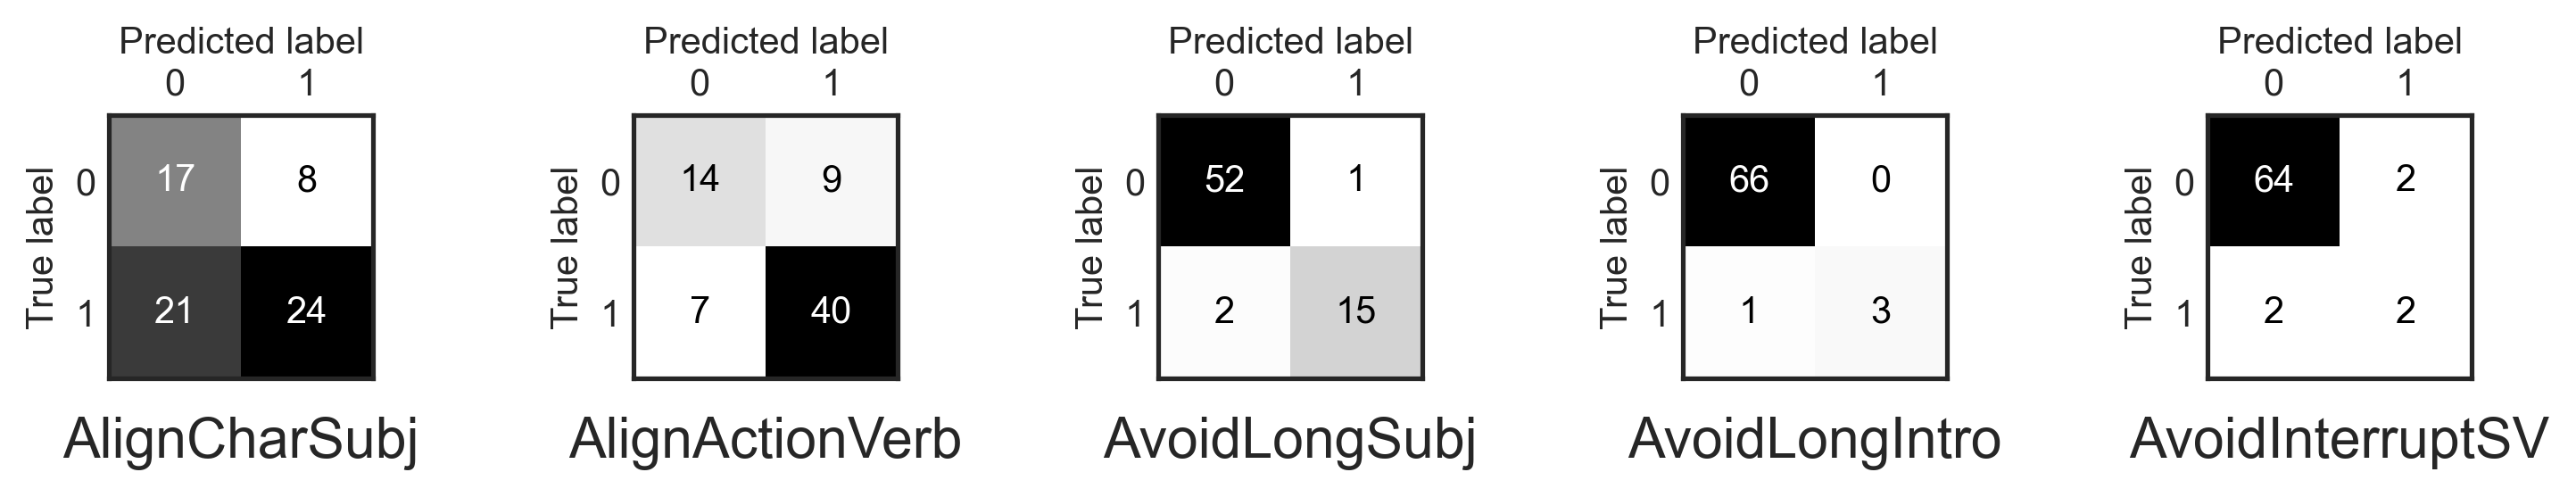

In [101]:
true = np.array(pickle.load(open('../orig_true_scores.pickle', 'rb')))
pred = np.array(pickle.load(open('../orig_pred_scores.pickle', 'rb')))


fig, ax = plt.subplots(1, 5, figsize=(10, 2), dpi=300)
for i in range(5):
    print(rules[i])
    cm = confusion_matrix(y_true=true[:,i], y_pred=pred[:,i], labels=[0, 1])
    cr = classification_report(y_true=true[:,i], y_pred=pred[:,i], labels=[0, 1])
    print(cr)
    print(cm, end='\n\n')

    cmd = ConfusionMatrixDisplay.from_predictions(
        y_true=true[:,i], y_pred=pred[:,i],
        ax=ax[i],
        colorbar=False,
        cmap='Greys',
        labels=[0, 1]
    )
    # ax[i].set_title(rules[i], pad=15)
    ax[i].xaxis.set_ticks_position('top')
    ax[i].xaxis.set_label_position('top')
    ax[i].text(0.5, 2.1, rules[i], fontsize=15, ha='center')
fig.set_tight_layout(tight=True)
fig.show()

AlignCharSubj
[[48 22]
 [ 0  0]]

AlignActionVerb
[[51 19]
 [ 0  0]]

AvoidLongSubj
[[70  0]
 [ 0  0]]

AvoidLongIntro
[[62  5]
 [ 0  3]]

AvoidInterruptSV
[[70  0]
 [ 0  0]]



C:\Users\Hp\AppData\Local\Temp\ipykernel_31452\120370469.py:23: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


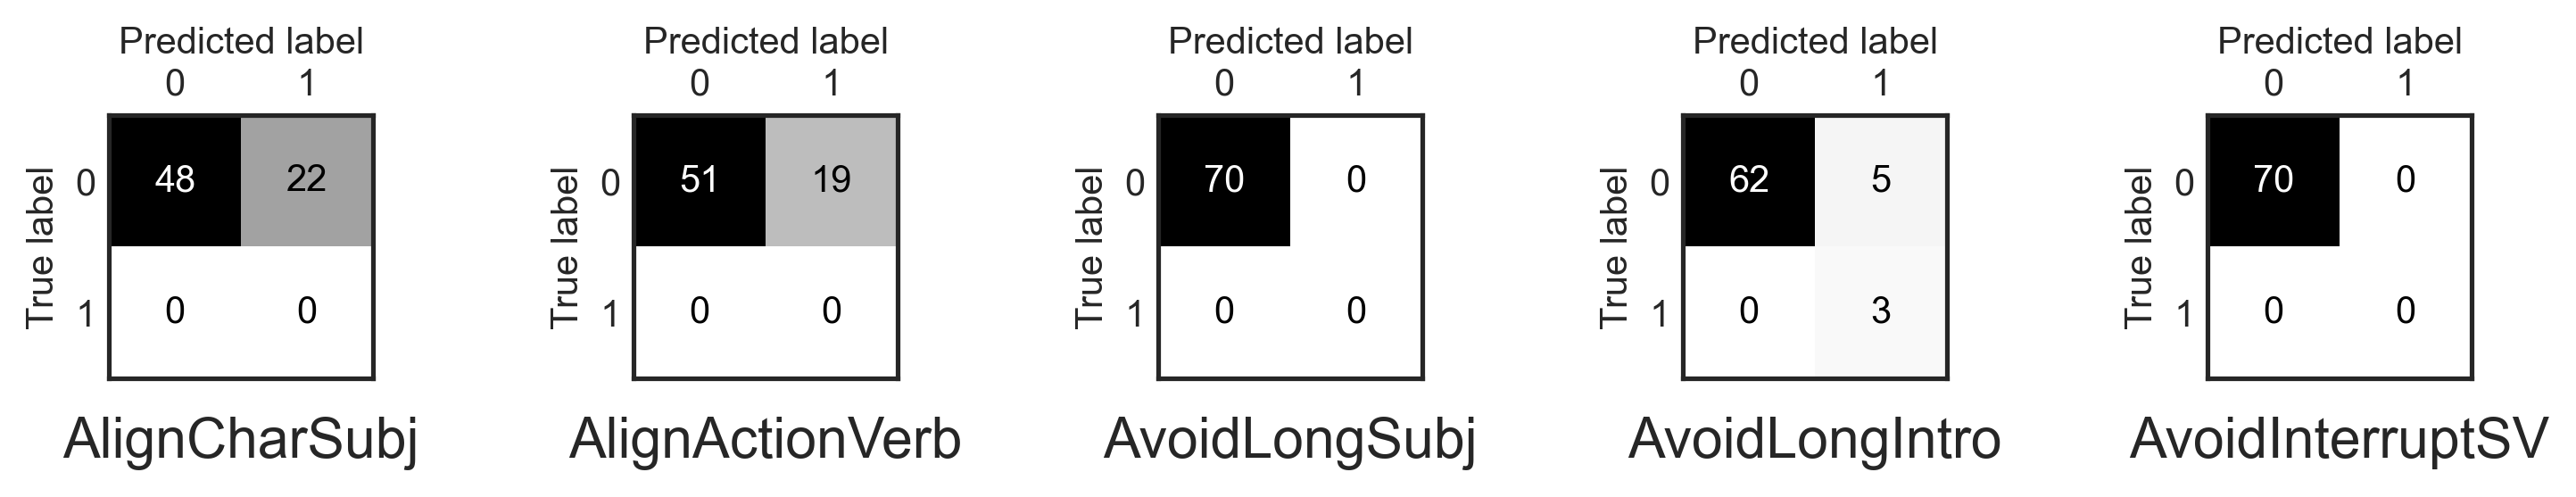

In [96]:
true = np.array(pickle.load(open('../para_true_scores.pickle', 'rb')))
pred = np.array(pickle.load(open('../para_pred_scores.pickle', 'rb')))

fig, ax = plt.subplots(1, 5, figsize=(10, 2), dpi=300)
for i in range(5):
    
    print(rules[i])
    cm = confusion_matrix(y_true=true[:,i], y_pred=pred[:,i], labels=[0, 1])
    print(cm, end='\n\n')
    
    cmd = ConfusionMatrixDisplay.from_predictions(
        y_true=true[:,i], y_pred=pred[:,i],
        ax=ax[i],
        colorbar=False,
        cmap='Greys',
        labels=[0, 1]
    )
    # ax[i].set_title(rules[i], pad=15)
    ax[i].xaxis.set_ticks_position('top')
    ax[i].xaxis.set_label_position('top')
    ax[i].text(0.5, 2.1, rules[i], fontsize=15, ha='center')
fig.set_tight_layout(tight=True)
fig.show()

In [104]:
from eval import *

In [247]:
annotation_file = 'StyleExamples/annotation-original.json'
prediction_file = 'StyleExamples/prediction-original.json'

annotations = read_annotation(annotation_file)
predictions = read_prediction(prediction_file)

In [248]:
true_scores = []
pred_scores = []
span_scores = []
for anno, pred in zip(annotations, predictions):
    anno = char_to_token(anno, tokens=pred['tokens'])
    true_scores.append(anno['score'])
    pred_scores.append(pred['score'])
    span_scores.append(evaluate_spans(pred['labels'], anno['labels']))

In [249]:
true_scores = np.array(true_scores)
pred_scores = np.array(pred_scores)

In [256]:
for x in range(2):
    for rule in [1]:
        print(rule, x)
        misclasf_idx = np.where(
            (true_scores[:, rule-1]==0) & \
            (pred_scores[:, rule-1]==x)
        )[0]
        mis_span = [span_scores[i] for i in misclasf_idx]

        span = 'character'
        p_char = [x['Precision'][span] for x in mis_span if x['Precision'][span]]
        r_char = [x['Recall'][span] for x in mis_span if x['Recall'][span]]
        f_char = [x['F1-score'][span] for x in mis_span if x['F1-score'][span]]

        print('{:.3f} {:.3f} {:.3f}'.format(np.mean(p_char), np.mean(r_char), np.mean(f_char)))

1 0
0.783 0.844 0.781
1 1
nan nan nan


C:\Users\Hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(0.75, 0.6083333333333333, 0.659047619047619)

In [195]:
p_char

[]